In [259]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   
from pathlib import Path






In [260]:

data_path ="../data/raw/telecom_customer_churn.csv"

df = pd.read_csv(data_path)
df.head()


,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [261]:
df.shape

(7043, 38)

In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

In [263]:
df["Churn"] = df["Customer Status"].apply(lambda x: 1 if x == "Churned" else 0)
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason,Churn
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN,0
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN,0
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices,1
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction,1
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability,1


Columns to drop:

Customer ID
Customer Status
Churn Category
Churn Reason

categorical columns
| Column                                           | Missing       | Strategy           |
| ------------------------------------------------ | ------------- | ------------------ |
| Offer                                            | ~3877 missing | Fill "No Offer"    |
| Multiple Lines                                   | ~682 missing  | Fill "No Phone"    |
| Internet Type                                    | ~1526 missing | Fill "No Internet" |
| Internet-related features (Online Security etc.) | ~1526 missing | Fill "No Internet" |


numerical columns


| Avg Monthly Long Distance Charges                | ~682 missing  | Fill 0 if no phone |

| Avg Monthly GB Download                          | ~1526 missing | Fill 0             |

In [264]:
df.drop(columns=["Customer ID", "Customer Status", "Churn Category","Churn Reason"], inplace=True)
df.head()

,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,...,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Churn
0,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,...,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,0
1,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,...,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,0
2,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,...,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,1
3,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,...,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,1
4,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,...,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,1


In [265]:
df["Avg Monthly Long Distance Charges"]

0       42.39
1       10.69
2       33.65
3       27.82
4        7.38
        ...  
7038    46.68
7039    16.20
7040    18.62
7041     2.12
7042      NaN
Name: Avg Monthly Long Distance Charges, Length: 7043, dtype: float64

In [266]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    print(f"{column}: {len(outliers)} outliers")
    return outliers


In [267]:
detect_outliers_iqr(df, "Avg Monthly Long Distance Charges")

Avg Monthly Long Distance Charges: 0 outliers


,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,...,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Churn


In [268]:
detect_outliers_iqr(df, "Avg Monthly GB Download")


Avg Monthly GB Download: 649 outliers


,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,...,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Churn
5,Female,23,No,3,Midpines,95345,37.581496,-119.972762,0,9,...,Month-to-Month,Yes,Credit Card,69.40,571.45,0.0,0,150.93,722.38,0
11,Female,25,Yes,2,Sunnyvale,94086,37.378541,-122.020456,2,72,...,Two Year,Yes,Credit Card,116.80,8456.75,0.0,0,1152.72,9609.47,0
26,Female,37,Yes,3,Parlier,93648,36.622237,-119.521126,10,55,...,One Year,Yes,Bank Withdrawal,103.70,5656.75,0.0,20,1927.20,7603.95,0
41,Female,20,No,0,Fremont,94539,37.516791,-121.899117,0,27,...,One Year,No,Credit Card,78.20,2078.95,0.0,0,1320.57,3399.52,0
50,Male,25,No,0,Tulelake,96134,41.813521,-121.492666,0,64,...,One Year,No,Bank Withdrawal,81.25,5567.55,0.0,40,351.36,5958.91,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6973,Female,19,No,0,Scotia,95565,40.440636,-124.098739,0,1,...,Month-to-Month,No,Credit Card,24.40,24.40,0.0,10,0.00,34.40,0
6974,Male,27,No,0,Valley Ford,94972,38.339996,-122.935056,0,66,...,One Year,Yes,Bank Withdrawal,114.30,7383.70,0.0,0,285.12,7668.82,0
7025,Male,20,No,0,Potter Valley,95469,39.408634,-123.045516,0,63,...,One Year,No,Bank Withdrawal,68.80,4111.35,0.0,0,2417.31,6528.66,0
7038,Female,20,No,0,La Mesa,91941,32.759327,-116.997260,0,13,...,One Year,No,Credit Card,55.15,742.90,0.0,0,606.84,1349.74,0


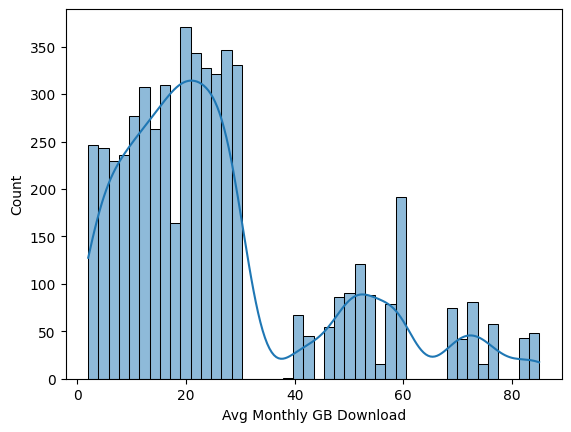

In [269]:
sns.histplot(df["Avg Monthly GB Download"], kde=True)
plt.show()

In [270]:
df[df["Phone Service"] == "No"].shape


(682, 35)

we are filling null values in Avg Monthly Long Distance Charges=0
Reason: If no phone service → no long distance → charges should be 0.

In [271]:
df["Avg Monthly Long Distance Charges"].fillna(0, inplace=True)

In [272]:
df[df["Internet Service"] == "No"].shape


(1526, 35)

In [273]:
df["Avg Monthly GB Download"].fillna(0, inplace=True)

In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   object 
 1   Age                                7043 non-null   int64  
 2   Married                            7043 non-null   object 
 3   Number of Dependents               7043 non-null   int64  
 4   City                               7043 non-null   object 
 5   Zip Code                           7043 non-null   int64  
 6   Latitude                           7043 non-null   float64
 7   Longitude                          7043 non-null   float64
 8   Number of Referrals                7043 non-null   int64  
 9   Tenure in Months                   7043 non-null   int64  
 10  Offer                              3166 non-null   object 
 11  Phone Service                      7043 non-null   objec

In [275]:
df = df.drop(columns=["City", "Zip Code", "Latitude", "Longitude"])


In [276]:
df.shape

(7043, 31)

In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   object 
 1   Age                                7043 non-null   int64  
 2   Married                            7043 non-null   object 
 3   Number of Dependents               7043 non-null   int64  
 4   Number of Referrals                7043 non-null   int64  
 5   Tenure in Months                   7043 non-null   int64  
 6   Offer                              3166 non-null   object 
 7   Phone Service                      7043 non-null   object 
 8   Avg Monthly Long Distance Charges  7043 non-null   float64
 9   Multiple Lines                     6361 non-null   object 
 10  Internet Service                   7043 non-null   object 
 11  Internet Type                      5517 non-null   objec

Offer → 3166 non-null

Multiple Lines → 6361 non-null

 13  Online Security                    5517 non-null   object 

 14  Online Backup                      5517 non-null   object  
 
 15  Device Protection Plan             5517 non-null   object  
 
 16  Premium Tech Support               5517 non-null   object  
 
 17  Streaming TV                       5517 non-null   object  
 
 18  Streaming Movies                   5517 non-null   object  
 
 19  Streaming Music                    5517 non-null   object 


Usage_Segment → 5517 non-null


In [278]:
df["Offer"] = df["Offer"].fillna("No Offer")
df["Multiple Lines"] = df["Multiple Lines"].fillna("No Phone")


In [279]:
df["Internet Type"] = df["Internet Type"].fillna("No Internet Service")
df["Internet Type"] = df["Internet Type"].fillna("No Internet Service")


In [280]:
internet_cols = [
    "Online Security",
    "Online Backup",
    "Device Protection Plan",
    "Premium Tech Support",
    "Streaming TV",
    "Streaming Movies",
    "Streaming Music",
    "Unlimited Data"
]

for col in internet_cols:
    df[col] = df[col].fillna("No Internet Service")


In [281]:
df["Offer"].value_counts()

Offer
No Offer    3877
Offer B      824
Offer E      805
Offer D      602
Offer A      520
Offer C      415
Name: count, dtype: int64

In [282]:
df["Multiple Lines"].isnull().sum()

np.int64(0)

In [283]:
df["Multiple Lines"].value_counts()

Multiple Lines
No          3390
Yes         2971
No Phone     682
Name: count, dtype: int64

In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   object 
 1   Age                                7043 non-null   int64  
 2   Married                            7043 non-null   object 
 3   Number of Dependents               7043 non-null   int64  
 4   Number of Referrals                7043 non-null   int64  
 5   Tenure in Months                   7043 non-null   int64  
 6   Offer                              7043 non-null   object 
 7   Phone Service                      7043 non-null   object 
 8   Avg Monthly Long Distance Charges  7043 non-null   float64
 9   Multiple Lines                     7043 non-null   object 
 10  Internet Service                   7043 non-null   object 
 11  Internet Type                      7043 non-null   objec

In [285]:
df["Internet Service"].value_counts()

Internet Service
Yes    5517
No     1526
Name: count, dtype: int64

In [286]:
df["Internet Type"].value_counts()

Internet Type
Fiber Optic            3035
DSL                    1652
No Internet Service    1526
Cable                   830
Name: count, dtype: int64

In [287]:
# df["Usage_Segment"] = pd.cut(
#     df["Avg Monthly GB Download"],
#     bins=[0, 30, 60, df["Avg Monthly GB Download"].max()],
#     labels=["Low", "Medium", "High"]
# )
# df["Usage_Segment"].value_counts()

In [288]:
df["Streaming Music"].value_counts()

Streaming Music
No                     3029
Yes                    2488
No Internet Service    1526
Name: count, dtype: int64

In [289]:
df["Streaming Movies"].value_counts()

Streaming Movies
No                     2785
Yes                    2732
No Internet Service    1526
Name: count, dtype: int64

In [290]:
df["Contract"].value_counts()

Contract
Month-to-Month    3610
Two Year          1883
One Year          1550
Name: count, dtype: int64

In [291]:
df["Total Revenue"].min()

np.float64(21.36)

In [292]:
df["Tenure in Months"].min()


np.int64(1)

In [293]:
df["Streaming TV"].value_counts()

Streaming TV
No                     2810
Yes                    2707
No Internet Service    1526
Name: count, dtype: int64

FEATURE ENGINEERING

In [294]:
df["Revenue_Per_Month"] = df["Total Revenue"] / df["Tenure in Months"]
df["Is_Monthly_Contract"] = (df["Contract"] == "Month-to-Month").astype(int)



In [295]:
df["Unlimited Data"].value_counts()

Unlimited Data
Yes                    4745
No Internet Service    1526
No                      772
Name: count, dtype: int64

In [296]:
df.columns

Index(['Gender', 'Age', 'Married', 'Number of Dependents',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Churn', 'Revenue_Per_Month', 'Is_Monthly_Contract'],
      dtype='object')

In [297]:

df.groupby("Churn")["Is_Monthly_Contract"].mean()

Churn
0    0.377851
1    0.885500
Name: Is_Monthly_Contract, dtype: float64

In [298]:
df.groupby("Churn")["Revenue_Per_Month"].mean()

Churn
0    84.431705
1    98.330990
Name: Revenue_Per_Month, dtype: float64

In [299]:
pd.crosstab(df["Streaming TV"], df["Churn"], normalize="index")


Churn,0,1
Streaming TV,,
No,0.664769,0.335231
No Internet Service,0.925950,0.074050
Yes,0.699298,0.300702


In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   object 
 1   Age                                7043 non-null   int64  
 2   Married                            7043 non-null   object 
 3   Number of Dependents               7043 non-null   int64  
 4   Number of Referrals                7043 non-null   int64  
 5   Tenure in Months                   7043 non-null   int64  
 6   Offer                              7043 non-null   object 
 7   Phone Service                      7043 non-null   object 
 8   Avg Monthly Long Distance Charges  7043 non-null   float64
 9   Multiple Lines                     7043 non-null   object 
 10  Internet Service                   7043 non-null   object 
 11  Internet Type                      7043 non-null   objec

ONE HOT ENCODING

In [301]:
categ_col= df.select_dtypes(include=["object"]).columns
categ_col

Index(['Gender', 'Married', 'Offer', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract',
       'Paperless Billing', 'Payment Method'],
      dtype='object')

In [302]:
binary_map = {
    "Gender": {"Male": 1, "Female": 0},
    "Married": {"Yes": 1, "No": 0},
    "Phone Service": {"Yes": 1, "No": 0},
    "Paperless Billing": {"Yes": 1, "No": 0},
    "Internet Service": {"Yes": 1, "No": 0}
}

for col, mapping in binary_map.items():
    df[col] = df[col].map(mapping)
df.head()

,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Churn,Revenue_Per_Month,Is_Monthly_Contract
0,0,37,1,0,2,9,No Offer,1,42.39,No,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,0,108.312222,0
1,1,46,0,0,0,9,No Offer,1,10.69,Yes,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,0,67.808889,1
2,1,50,0,0,0,4,Offer E,1,33.65,No,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,1,103.862500,1
3,1,78,1,0,1,13,Offer D,1,27.82,No,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,1,123.039231,1
4,0,75,1,0,3,3,No Offer,1,7.38,No,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,1,96.513333,1


In [303]:
dummy_cols = [
    "Offer",
    "Multiple Lines",
    "Internet Type",
    "Online Security",
    "Online Backup",
    "Device Protection Plan",
    "Premium Tech Support",
    "Streaming TV",
    "Streaming Movies",
    "Streaming Music",
    "Unlimited Data",
    "Payment Method"
]

df = pd.get_dummies(df, columns=dummy_cols, drop_first=True)
df.head()

,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Internet Service,Avg Monthly GB Download,...,Streaming TV_No Internet Service,Streaming TV_Yes,Streaming Movies_No Internet Service,Streaming Movies_Yes,Streaming Music_No Internet Service,Streaming Music_Yes,Unlimited Data_No Internet Service,Unlimited Data_Yes,Payment Method_Credit Card,Payment Method_Mailed Check
0,0,37,1,0,2,9,1,42.39,1,16.0,...,False,True,False,False,False,False,False,True,True,False
1,1,46,0,0,0,9,1,10.69,1,10.0,...,False,False,False,True,False,True,False,False,True,False
2,1,50,0,0,0,4,1,33.65,1,30.0,...,False,False,False,False,False,False,False,True,False,False
3,1,78,1,0,1,13,1,27.82,1,4.0,...,False,True,False,True,False,False,False,True,False,False
4,0,75,1,0,3,3,1,7.38,1,11.0,...,False,True,False,False,False,False,False,True,True,False


In [304]:
df = df.drop(columns=["Contract"])
df.head()

,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Internet Service,Avg Monthly GB Download,...,Streaming TV_No Internet Service,Streaming TV_Yes,Streaming Movies_No Internet Service,Streaming Movies_Yes,Streaming Music_No Internet Service,Streaming Music_Yes,Unlimited Data_No Internet Service,Unlimited Data_Yes,Payment Method_Credit Card,Payment Method_Mailed Check
0,0,37,1,0,2,9,1,42.39,1,16.0,...,False,True,False,False,False,False,False,True,True,False
1,1,46,0,0,0,9,1,10.69,1,10.0,...,False,False,False,True,False,True,False,False,True,False
2,1,50,0,0,0,4,1,33.65,1,30.0,...,False,False,False,False,False,False,False,True,False,False
3,1,78,1,0,1,13,1,27.82,1,4.0,...,False,True,False,True,False,False,False,True,False,False
4,0,75,1,0,3,3,1,7.38,1,11.0,...,False,True,False,False,False,False,False,True,True,False


In [305]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 48 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Gender                                      7043 non-null   int64  
 1   Age                                         7043 non-null   int64  
 2   Married                                     7043 non-null   int64  
 3   Number of Dependents                        7043 non-null   int64  
 4   Number of Referrals                         7043 non-null   int64  
 5   Tenure in Months                            7043 non-null   int64  
 6   Phone Service                               7043 non-null   int64  
 7   Avg Monthly Long Distance Charges           7043 non-null   float64
 8   Internet Service                            7043 non-null   int64  
 9   Avg Monthly GB Download                     7043 non-null   float64
 10  Paperless Bi

In [306]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler

In [307]:
x=df.drop(columns=["Churn"])
y=df["Churn"]

In [308]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [310]:
x_train.shape

(5634, 47)

In [311]:
x_test.shape

(1409, 47)

In [312]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

model training 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [316]:
from sklearn.metrics import accuracy_score

In [339]:
model=LogisticRegression()
model.fit(x_train_scaled, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [340]:
y_pred = model.predict(x_test_scaled)



In [341]:
y_pred

array([0, 0, 0, ..., 1, 0, 0], shape=(1409,))

In [345]:
y_probs = model.predict_proba(x_test_scaled)[:, 1]


In [346]:
y_probs

array([0.02120944, 0.19182673, 0.02832615, ..., 0.63831388, 0.02180998,
       0.00515775], shape=(1409,))

In [347]:
print(y_probs[:20])
print(min(y_probs), max(y_probs))


[2.12094385e-02 1.91826732e-01 2.83261519e-02 7.90275948e-01
 1.27908946e-02 7.13476456e-01 5.48232508e-02 2.19963438e-01
 1.69632395e-02 7.69447932e-02 1.01820502e-01 7.75807440e-04
 1.50183870e-01 2.71633586e-03 4.48258187e-01 3.42740978e-01
 3.97311925e-01 6.77331820e-03 5.97430303e-01 2.95357992e-01]
2.3196554279043002e-05 0.9704163044698129


In [359]:
from sklearn.metrics import roc_auc_score

In [360]:
roc_auc_score(y_test, y_probs)

0.8876168393594668

In [348]:
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]

for t in thresholds:
    y_pred_custom = (y_probs >= t).astype(int)
    print(f"\nThreshold: {t}")
    print(classification_report(y_test, y_pred_custom))


Threshold: 0.3
              precision    recall  f1-score   support

           0       0.93      0.80      0.86      1036
           1       0.60      0.83      0.70       373

    accuracy                           0.81      1409
   macro avg       0.76      0.82      0.78      1409
weighted avg       0.84      0.81      0.82      1409


Threshold: 0.4
              precision    recall  f1-score   support

           0       0.91      0.86      0.88      1036
           1       0.66      0.75      0.70       373

    accuracy                           0.83      1409
   macro avg       0.78      0.81      0.79      1409
weighted avg       0.84      0.83      0.83      1409


Threshold: 0.5
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1036
           1       0.70      0.66      0.68       373

    accuracy                           0.84      1409
   macro avg       0.79      0.78      0.79      1409
weighted avg       0.83   

In [335]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.93      0.76      0.84      1036
           1       0.56      0.85      0.68       373

    accuracy                           0.79      1409
   macro avg       0.75      0.81      0.76      1409
weighted avg       0.83      0.79      0.80      1409



In [320]:
print(confusion_matrix(y_test, y_pred))

[[930 106]
 [125 248]]


In [329]:
print("Train Accuracy:", model.score(x_train, y_train))
print("Test Accuracy:", model.score(x_test, y_test))

Train Accuracy: 0.2655307064252751
Test Accuracy: 0.26472675656493966


/Users/srijanpatel/Documents/AI_ML_CAPSTONE/customer-churn-prediction-mL/venv/lib/python3.14/site-packages/sklearn/utils/validation.py:2684: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Users/srijanpatel/Documents/AI_ML_CAPSTONE/customer-churn-prediction-mL/venv/lib/python3.14/site-packages/sklearn/utils/validation.py:2684: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
accuracy_score(y_test, y_pred)

In [321]:
accuracy_score(y_test, y_pred)

0.8360539389638041

DECIISON TREE

In [322]:
from sklearn.tree import DecisionTreeClassifier

In [363]:
tree = DecisionTreeClassifier(
        max_depth=8,
        min_samples_split=20,
        min_samples_leaf=10,
        random_state=42
    )
    
tree.fit(x_train_scaled, y_train)
y_pred = tree.predict(x_test_scaled)
print(roc_auc_score(y_test, tree.predict_proba(x_test_scaled)[:, 1]))

0.8601395344022689


In [362]:
depths = range(2, 21)

for d in depths:
    tree = DecisionTreeClassifier(
        max_depth=d,
        min_samples_split=20,
        min_samples_leaf=10,
        random_state=42
    )
    
    tree.fit(x_train_scaled, y_train)
    y_pred = tree.predict(x_test_scaled)
    
    classification_report_Data = classification_report(y_test, y_pred)
    
    print(f"Depth: {d} | Train: {tree.score(x_train_scaled, y_train):.3f} | Test: {tree.score(x_test_scaled, y_test):.3f} ")
    print(classification_report_Data)

Depth: 2 | Train: 0.783 | Test: 0.781 
              precision    recall  f1-score   support

           0       0.78      0.98      0.87      1036
           1       0.80      0.23      0.35       373

    accuracy                           0.78      1409
   macro avg       0.79      0.60      0.61      1409
weighted avg       0.79      0.78      0.73      1409

Depth: 3 | Train: 0.786 | Test: 0.781 
              precision    recall  f1-score   support

           0       0.78      0.98      0.87      1036
           1       0.84      0.22      0.34       373

    accuracy                           0.78      1409
   macro avg       0.81      0.60      0.61      1409
weighted avg       0.79      0.78      0.73      1409

Depth: 4 | Train: 0.818 | Test: 0.810 
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1036
           1       0.65      0.61      0.63       373

    accuracy                           0.81      1409
   macro av

In [355]:
tree.fit(x_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",10
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current n

In [356]:
y_pred = tree.predict(x_test)

In [357]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1036
           1       0.67      0.64      0.65       373

    accuracy                           0.82      1409
   macro avg       0.77      0.76      0.77      1409
weighted avg       0.82      0.82      0.82      1409



In [358]:
print("Train Accuracy:", tree.score(x_train, y_train))
print("Test Accuracy:", tree.score(x_test, y_test))

Train Accuracy: 0.901313454029109
Test Accuracy: 0.8211497515968772
